In [6]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Carrega as variáveis de ambiente do arquivo .env
load_dotenv(dotenv_path="../.env_dev")


True

In [8]:
def create_conn():
    # Defina os parâmetros de conexão
    db_user = os.getenv('DB_USER')
    db_password = os.getenv('DB_PASSWORD')
    db_host = os.getenv('DB_HOST')
    db_port = '5432'
    db_name = 'magic-steps'

    # Crie a URL de conexão
    connection_url = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

    # Crie um engine do SQLAlchemy
    engine = create_engine(connection_url)
    return engine
engine = create_conn()

In [9]:
engine = create_conn()

tabela_nome = 'vw_aluno_inativo'
query = f'SELECT * FROM magic_steps.{tabela_nome}'
df_aluno_inativo = pd.read_sql_query(query, con=engine)
df_aluno_inativo.head()

,IdAluno,IdUnidade,Sexo,EstadoCivil,DataNascimento,CorRaca,EnsinoMedio_IdEstabelecimentoEnsino,EnsinoMedio_AnoConclusao,IdTurma,IdSituacaoAlunoTurma,...,ProblemaAutorizadoMatricula,IdMotivoInativacao,ComentarioInativacao,IdPlanoPagamento_Matricula,MotivoInativacao,DataOcorrencia,DataInclusao,ObservacaoLiberacao,NomeTipoOcorrencia,IdTipoOcorrencia
0,456,1.0,M,5.0,2009-12-31 02:00:00,B,None,None,445,14,...,,2,,NaN,Falta de retorno as nossas tentativas de contato,2021-08-24 00:00:00,2021-08-24 17:01:00,None,*Mudança de Turma*,12.0
1,456,1.0,M,5.0,2009-12-31 02:00:00,B,None,None,224,14,...,,2,,NaN,Falta de retorno as nossas tentativas de contato,2021-08-24 00:00:00,2021-08-24 17:01:00,None,*Mudança de Turma*,12.0
2,456,1.0,M,5.0,2009-12-31 02:00:00,B,None,None,169,14,...,#ALUNO_MATRICULA_INVALIDA##ALUNO_APROVADO_MESM...,2,,9.0,Falta de retorno as nossas tentativas de contato,2021-08-24 00:00:00,2021-08-24 17:01:00,None,*Mudança de Turma*,12.0
3,444,1.0,F,5.0,2007-09-05 00:00:00,B,None,None,88,14,...,,4,Retorno das aulas na escola para o presencial ...,8.0,Conflito com horário escolar / período integral,2021-08-24 00:00:00,2021-08-24 19:56:00,None,*Desativação*,13.0
4,152,1.0,M,5.0,2006-03-25 03:00:00,B,None,None,226,14,...,,2,,NaN,Falta de retorno as nossas tentativas de contato,2021-08-31 00:00:00,2021-08-31 13:46:00,None,*Desativação*,13.0


In [10]:
df_aluno_inativo.shape

(13967, 23)

In [37]:
engine = create_conn()

tabela_nome = 'vw_aluno'
query = f'SELECT * FROM magic_steps.{tabela_nome}'
df_alunos = pd.read_sql_query(query, con=engine)
df_alunos.head()

,IdAluno,IdUnidade,Sexo,EstadoCivil,DataNascimento,CorRaca,EnsinoMedio_IdEstabelecimentoEnsino,EnsinoMedio_AnoConclusao,IdTurma,IdSituacaoAlunoTurma,DataSituacaoAtivo,DataSituacaoInativo,DataHoraEfetivacaoMatricula,ProblemaAutorizadoMatricula,IdMotivoInativacao,ComentarioInativacao,IdPlanoPagamento_Matricula,MotivoInativacao
0,3.0,1.0,F,5.0,2005-03-29 03:00:00,R,None,None,106.0,9.0,2021-01-01 00:00:00,2021-12-31 00:00:00,2021-07-30 00:00:00,,NaN,,8.0,None
1,5.0,1.0,F,5.0,2002-01-25 02:00:00,B,None,None,113.0,9.0,2021-01-01 00:00:00,2021-12-31 00:00:00,2021-07-30 00:00:00,,NaN,,8.0,None
2,6.0,1.0,M,5.0,2002-10-07 03:00:00,R,None,None,113.0,9.0,2021-01-01 00:00:00,2021-12-31 00:00:00,2021-07-30 00:00:00,,NaN,,8.0,None
3,4.0,1.0,F,5.0,2004-11-04 02:00:00,B,None,None,106.0,9.0,2021-01-01 00:00:00,2021-12-31 00:00:00,2021-07-30 00:00:00,,NaN,,8.0,None
4,7.0,1.0,M,5.0,2002-12-23 02:00:00,R,None,None,113.0,9.0,2021-01-01 00:00:00,2021-12-31 00:00:00,2021-07-30 00:00:00,,NaN,,8.0,None


In [38]:
df_alunos.shape

(9233, 18)

In [17]:
# Proporção por sexo
df_alunos["Sexo"].value_counts()

Sexo
F    5080
M    4143
Name: count, dtype: int64

In [20]:
# Proporção em %
(df_alunos["Sexo"].value_counts(normalize=True)*100)

Sexo
F    55.079692
M    44.920308
Name: proportion, dtype: float64

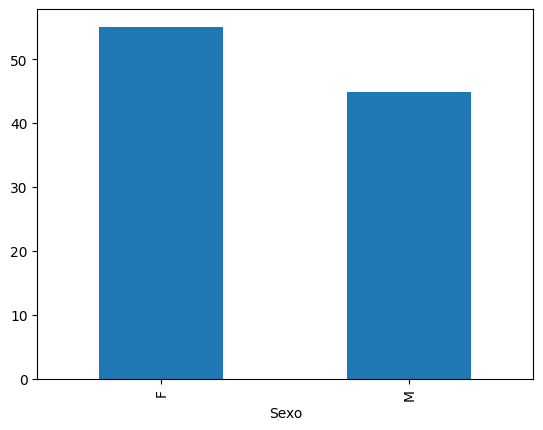

In [21]:
(df_alunos["Sexo"].value_counts(normalize=True)*100).plot(kind='bar')

plt.show()

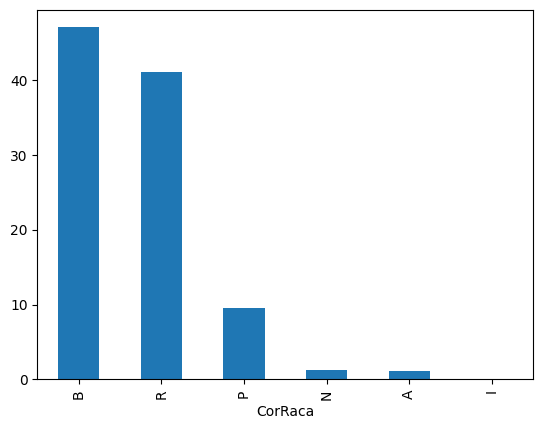

In [22]:
# Proporção dos dados por Cor e Raça
(df_alunos["CorRaca"].value_counts(normalize=True)*100).plot(kind='bar')

plt.show()

## Analisando os Inativos

Sexo
F    53.846154
M    46.153846
Name: proportion, dtype: float64


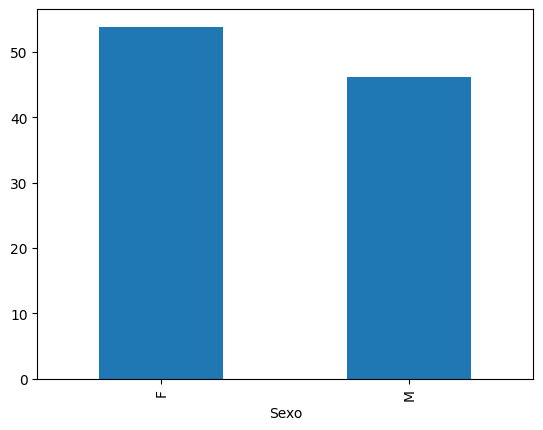

In [24]:

(df_aluno_inativo.drop_duplicates(subset=['IdAluno'])["Sexo"].value_counts(normalize=True)*100).plot(kind='bar')
print(df_aluno_inativo.drop_duplicates(subset=['IdAluno'])["Sexo"].value_counts(normalize=True)*100)
plt.show()

CorRaca
B    45.312500
R    42.307692
P    10.216346
N     1.442308
A     0.721154
Name: proportion, dtype: float64


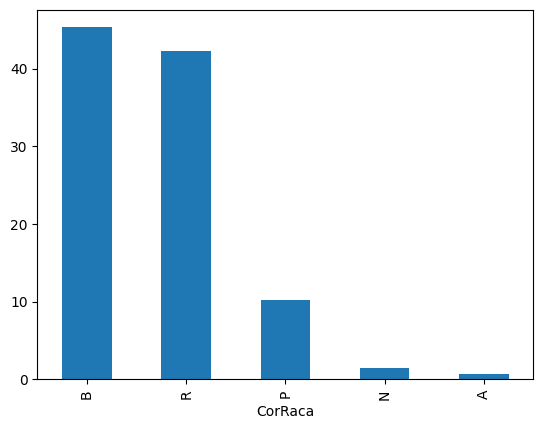

In [26]:
(df_aluno_inativo.drop_duplicates(subset=['IdAluno'])["CorRaca"].value_counts(normalize=True)*100).plot(kind='bar')
print(df_aluno_inativo.drop_duplicates(subset=['IdAluno'])["CorRaca"].value_counts(normalize=True)*100)
plt.show()

In [27]:
#  população dos inativos
df_aluno_inativo.drop_duplicates(subset=['IdAluno']).shape

(833, 23)

### Analisando o Tipo de Ocorrencia

In [28]:
alunos_inativos_pct = (df_aluno_inativo["NomeTipoOcorrencia"].value_counts(normalize=True)*100)
df_alunos_inativos_pct = pd.DataFrame(alunos_inativos_pct)

In [29]:
df_alunos_inativos_pct.head(5)

,proportion
NomeTipoOcorrencia,
Psicol da família: Atividade Passos em família,31.645298
Grupo 2 - Ansiedade (Angústia) HD,11.904591
*Desativação*,11.825800
Assistência Social - Atendimento Família,7.692859
Realiza atendimento em grupo,7.084020


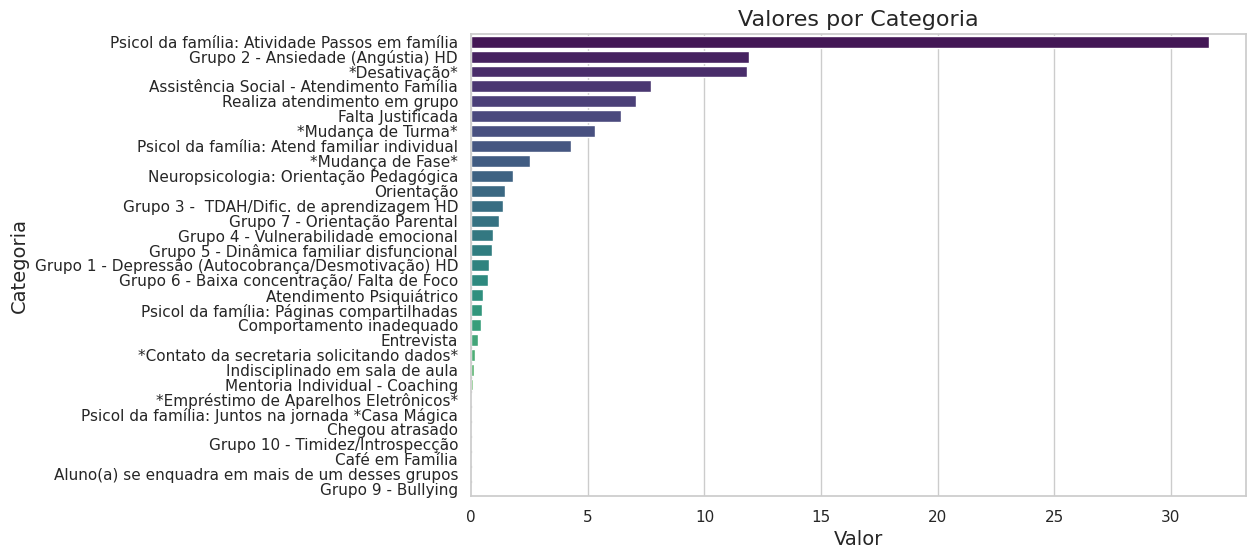

In [30]:
# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Plotar o gráfico de barras vertical
plt.figure(figsize=(10, 6))
ax = sns.barplot(y="NomeTipoOcorrencia",x="proportion" ,data=df_alunos_inativos_pct, palette='viridis',hue='NomeTipoOcorrencia', dodge=False)

# Adicionar títulos e rótulos aos eixos
ax.set_title('Valores por Categoria', fontsize=16)
ax.set_xlabel('Valor', fontsize=14)
ax.set_ylabel('Categoria', fontsize=14)

# Exibir o gráfico
plt.show()


### Analisando a Motivo Inativação

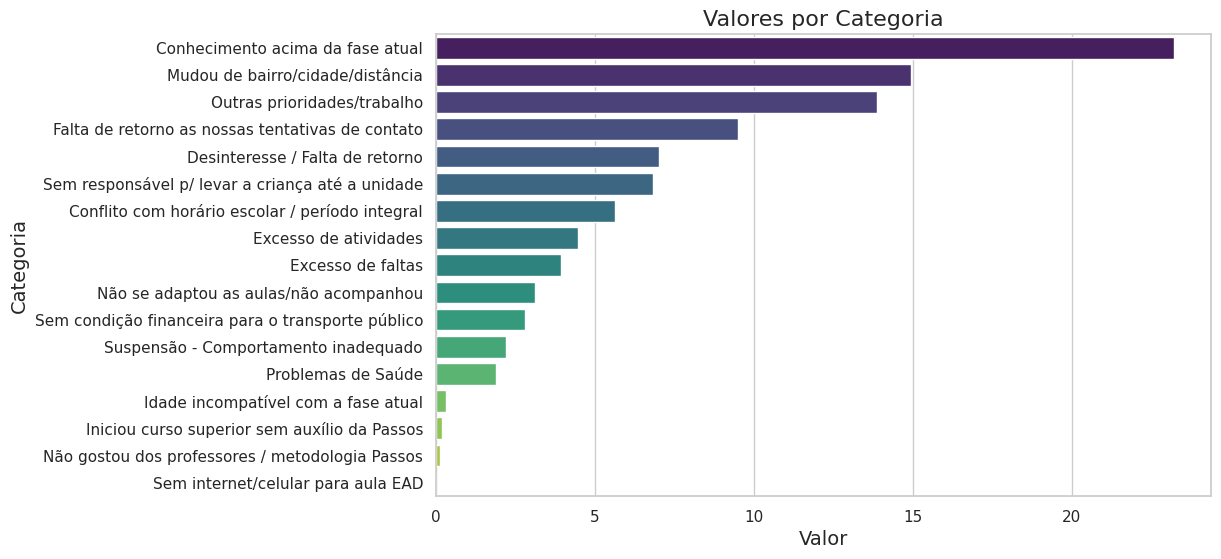

In [31]:
alunos_motivo_inativacao_pct = (df_aluno_inativo["MotivoInativacao"].value_counts(normalize=True)*100)
df_alunos_motivo_inativacao_pct = pd.DataFrame(alunos_motivo_inativacao_pct)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(y="MotivoInativacao",x="proportion" ,data=df_alunos_motivo_inativacao_pct, palette='viridis',hue='MotivoInativacao', dodge=False)

ax.set_title('Valores por Categoria', fontsize=16)
ax.set_xlabel('Valor', fontsize=14)
ax.set_ylabel('Categoria', fontsize=14)

# Exibir o gráfico
plt.show()


In [61]:
# removendo duplicidade, esta duplicidade é por conta das observações que existem na tabela
alunos_distintos = df_alunos.drop_duplicates(subset=['IdAluno'])
alunos_distintos = alunos_distintos[alunos_distintos["IdMotivoInativacao"].isna()]
alunos_distintos.shape



(1936, 18)

In [65]:
df_aluno_inativo.drop_duplicates(subset=['IdAluno'])['IdAluno'].count()

np.int64(833)

         DataFrame  Total
0    Alunos Ativos   1936
1  Alunos Inativos    833


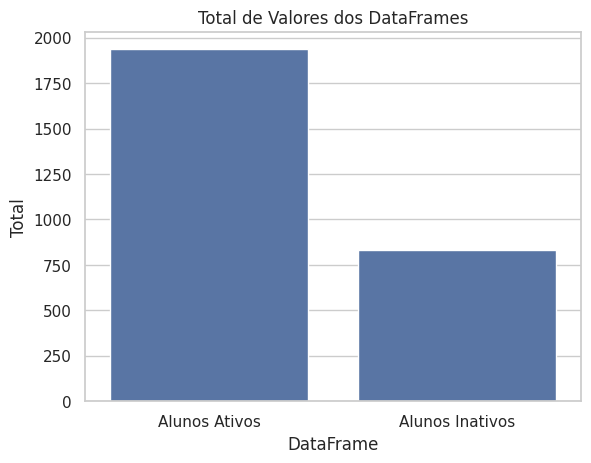

In [69]:
total_df1 = alunos_distintos['IdAluno'].count()
total_df2 = df_aluno_inativo.drop_duplicates(subset=['IdAluno'])['IdAluno'].count()

df_totals = pd.DataFrame({
    'DataFrame': ['Alunos Ativos', 'Alunos Inativos'],
    'Total': [total_df1, total_df2]
})

print(df_totals)

# Plotando o gráfico de barras
sns.barplot(x='DataFrame', y='Total', data=df_totals)
plt.title('Total de Valores dos DataFrames')
plt.xlabel('DataFrame')
plt.ylabel('Total')
plt.show()

